<a href="https://colab.research.google.com/github/kkorhone/Python_Notebooks/blob/main/PygThermalResistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pygfunction

     |████████████████████████████████| 81kB 3.4MB/s 


In [2]:
import pygfunction as gt
from numpy import pi

Borehole thermal resistance: 0.0798 m.K/W
The geometry of the borehole is valid (realistic/possible): True


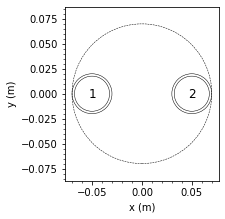

In [6]:
def main():

    # Borehole dimensions

    H = 300.0       # Borehole length (m)
    D = 0.0         # Borehole buried depth (m)
    r_b = 0.070     # Borehole radius (m)

    # Pipe dimensions

    rp_out = 0.020      # Pipe outer radius (m)
    rp_in = 0.0176      # Pipe inner radius (m)
    D_s = 0.05         # Shank spacing (m)
    epsilon = 1.0e-6    # Pipe roughness (m)

    # Pipe positions:
    # Single U-tube [(x_in, y_in), (x_out, y_out)]

    pos = [(-D_s, 0.), (D_s, 0.)]

    # Define a borehole

    borehole = gt.boreholes.Borehole(H, D, r_b, x=0., y=0.)

    # Thermal conductivities

    k_p = 0.43     # Pipe thermal conductivity (W/m.K)
    k_s = 3.00     # Ground thermal conductivity (W/m.K)
    k_g = 1.80     # Grout thermal conductivity (W/m.K)

    # Fluid properties

    m_flow = 0.6       # Total fluid mass flow rate per borehole (kg/s)
    cp_f = 4022.       # Fluid specific isobaric heat capacity (J/kg.K)
    den_f = 960.0      # Fluid density (kg/m3)
    visc_f = 0.006     # Fluid dynamic viscosity (kg/m.s)
    k_f = 0.43         # Fluid thermal conductivity (W/m.K)

    # Pipe thermal resistance

    R_p = gt.pipes.conduction_thermal_resistance_circular_pipe(rp_in, rp_out, k_p)

    # Fluid to inner pipe wall thermal resistance (Single U-tube)

    h_f = gt.pipes.convective_heat_transfer_coefficient_circular_pipe(m_flow, rp_in, visc_f, den_f, k_f, cp_f, epsilon)
    R_f = 1.0 / (h_f * 2 * pi * rp_in)

    SingleUTube = gt.pipes.SingleUTube(pos, rp_in, rp_out, borehole, k_s, k_g, R_f+R_p)

    Rb = gt.pipes.borehole_thermal_resistance(SingleUTube, m_flow, cp_f)

    print(f"Borehole thermal resistance: {Rb:.4f} m.K/W")

    # Check the geometry to make sure it is physically possible

    # This class method is automatically called at the instanciation of the
    # pipe object and raises an error if the pipe geometry is invalid. It is
    # manually called here for demosntration.

    check = SingleUTube._check_geometry()

    print("The geometry of the borehole is valid (realistic/possible): " + str(check))

    # Create a borehole top view

    fig = SingleUTube.visualize_pipes()

    # Save the figure as a pdf

    # fig.savefig('borehole-top-view.pdf')


if __name__ == '__main__':
    main()